In [2]:
# general imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from jupyterthemes import jtplot  
jtplot.style(theme='grade3',grid=False)

from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelBinarizer
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.simplefilter(action='ignore')

In [3]:
df_full = pd.read_csv("DS3_C6_S2_Classification_HouseGrade_Data_Project.csv")
df_full.isna().sum()

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

In [4]:
df_full

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,341,9,6,5,7,YES,95,115,5,90,2,4246,B
2996,2997,292,9,8,7,8,YES,116,87,7,97,4,3753,A
2997,2998,328,7,4,3,5,NO,0,78,5,95,6,3607,D
2998,2999,293,9,7,7,8,NO,0,78,7,51,3,4198,B


In [5]:
lb = LabelBinarizer()
df_full["roof"]=lb.fit_transform(df_full["roof"])

In [5]:
df_full

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,0,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,1,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,1,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,1,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,0,0,75,3,40,1,3843,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,341,9,6,5,7,1,95,115,5,90,2,4246,B
2996,2997,292,9,8,7,8,1,116,87,7,97,4,3753,A
2997,2998,328,7,4,3,5,0,0,78,5,95,6,3607,D
2998,2999,293,9,7,7,8,0,0,78,7,51,3,4198,B


In [6]:
df_full.nunique()

Id                3000
Area(total)         71
Trooms               5
Nbedrooms            7
Nbwashrooms          8
Twashrooms           9
roof                 2
Roof(Area)          52
Lawn(Area)          51
Nfloors              7
API                 61
ANB                  6
Expected price    1647
Grade                5
dtype: int64

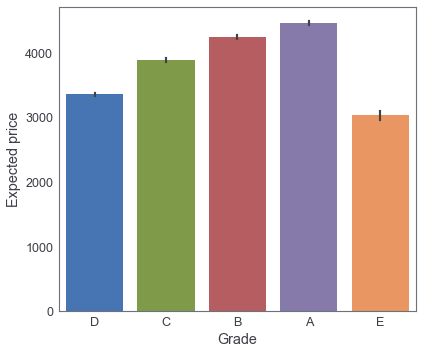

In [7]:
sns.barplot(x="Grade",y="Expected price",data=df_full)
plt.show()

#### We can observe that Grade A properties are priced Highest and Grade D is priced Lowest

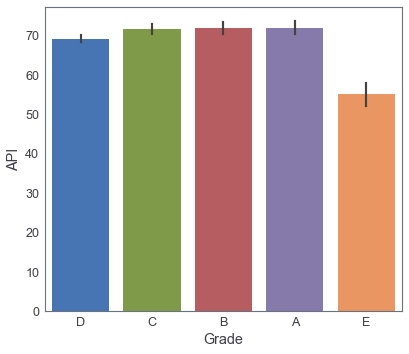

In [8]:
sns.barplot(x="Grade",y="API",data=df_full)
plt.show()

#### There is no direct relation between GRADE & Air Pollution Index

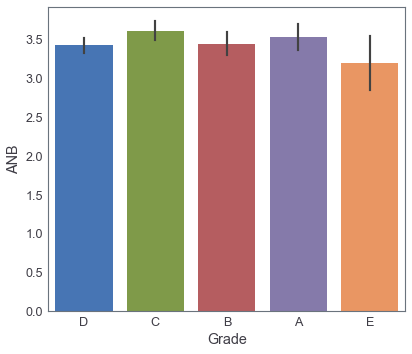

In [9]:
sns.barplot(x="Grade",y="ANB",data=df_full)
plt.show()

#### There is no direct relation between GRADE & ANB

In [10]:
df_full.drop("Id",axis=1).corr()

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
Area(total),1.000000,0.019041,0.031328,0.031819,0.038509,0.014229,0.017029,-0.002118,0.016819,-0.000182,-0.010846,0.274507
Trooms,0.019041,1.000000,0.865878,0.827072,0.794870,0.025142,0.026550,0.009557,0.862367,0.007502,0.007321,0.820170
Nbedrooms,0.031328,0.865878,1.000000,0.956578,0.919158,0.023058,0.025073,0.000054,0.742132,0.002820,0.015403,0.715687
Nbwashrooms,0.031819,0.827072,0.956578,1.000000,0.960007,0.028549,0.028832,0.006617,0.711936,0.011413,0.008475,0.683659
Twashrooms,0.038509,0.794870,0.919158,0.960007,1.000000,0.028212,0.028763,0.008386,0.684966,0.012361,0.016492,0.654627
roof,0.014229,0.025142,0.023058,0.028549,0.028212,1.000000,0.976561,-0.004640,0.014985,-0.007983,-0.020511,0.007880
Roof(Area),0.017029,0.026550,0.025073,0.028832,0.028763,0.976561,1.000000,-0.006831,0.013840,-0.006331,-0.015529,0.009346
Lawn(Area),-0.002118,0.009557,0.000054,0.006617,0.008386,-0.004640,-0.006831,1.000000,0.013771,0.011477,0.025751,0.011561
Nfloors,0.016819,0.862367,0.742132,0.711936,0.684966,0.014985,0.013840,0.013771,1.000000,-0.002255,0.020614,0.714598
API,-0.000182,0.007502,0.002820,0.011413,0.012361,-0.007983,-0.006331,0.011477,-0.002255,1.000000,-0.025694,0.016575


#### For further Modelling we can drop features namely **Id,API,ANB** as they don't have any significant effect on the Target feature GRADE

In [6]:
#Creating a function for  checki9ng thge model performance
def model_performance(model):
    # accuracy on X_test
    accuracy = round(model.score(X_test, y_test)*100,2)
    print(f"The accuracy of {model} is {accuracy} %\n")
    
    #creating a confusion matrix
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    cmd = pd.DataFrame(cm)
    cmd.rename(columns={0:"A",1:"B",2:"C",3:"D",4:"E"}, 
           index = {0:"A",1:"B",2:"C",3:"D",4:"E"},
           inplace = True)
    sns.heatmap(cmd,annot = True,fmt="g")
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()
    return accuracy , y_pred

###### Selecting required features and spliting the data into train and test split

In [7]:
X = df_full.drop(["Id","Grade","API","ANB"], axis=1)
y = df_full["Grade"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20,random_state = 42)

In [13]:
#testing best estimator for knn model
param_grid = {'n_neighbors': [3,4,5,6,7,8,9,10]}
grid_rdf = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_rdf.fit(X_train, y_train)
a=grid_rdf.best_estimator_
print(a)

KNeighborsClassifier(n_neighbors=7)


The accuracy of KNeighborsClassifier(n_neighbors=7) is 58.5 %

              precision    recall  f1-score   support

           A       0.44      0.48      0.46        87
           B       0.34      0.32      0.33       106
           C       0.39      0.37      0.38       125
           D       0.80      0.83      0.82       272
           E       1.00      0.20      0.33        10

    accuracy                           0.58       600
   macro avg       0.59      0.44      0.46       600
weighted avg       0.58      0.58      0.58       600



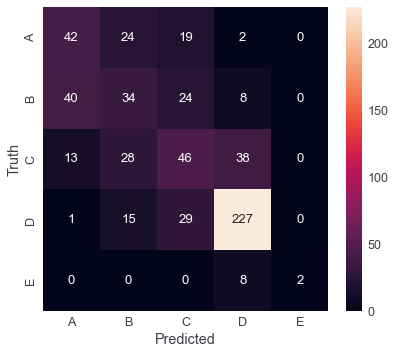

In [14]:
# training a KNN classifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
knn_accuracy,kn_pred = model_performance(knn)

###### We can observe that accuracy is 56.33 % , which is quite low .
###### Also many properties have been misclassified.

The accuracy of DecisionTreeClassifier(max_depth=2) is 74.0 %

              precision    recall  f1-score   support

           A       0.98      0.61      0.75        87
           B       0.54      0.97      0.70       106
           C       0.58      0.51      0.54       125
           D       0.91      0.82      0.86       272
           E       0.00      0.00      0.00        10

    accuracy                           0.74       600
   macro avg       0.60      0.58      0.57       600
weighted avg       0.77      0.74      0.74       600



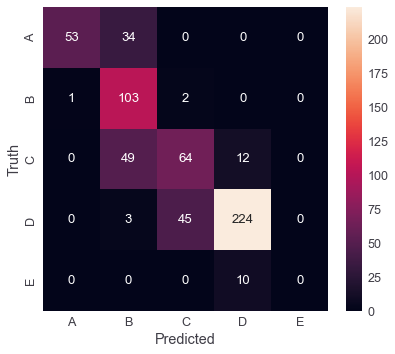

In [15]:
# training a DescisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
dtree_accuracy,dtree_pred = model_performance(dtree)

The accuracy of GaussianNB() is 80.67 %

              precision    recall  f1-score   support

           A       0.90      0.86      0.88        87
           B       0.70      0.83      0.76       106
           C       0.69      0.67      0.68       125
           D       0.93      0.84      0.88       272
           E       0.35      0.80      0.48        10

    accuracy                           0.81       600
   macro avg       0.71      0.80      0.74       600
weighted avg       0.83      0.81      0.81       600



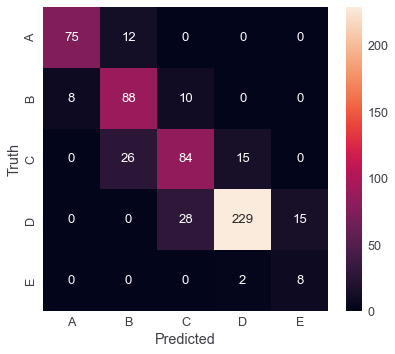

In [16]:
# training a Gaussian Naive Bayes classifier
gnb = GaussianNB().fit(X_train, y_train)
gnb_accuracy,gnb_pred = model_performance(gnb)

In [18]:
#testing best estimator for knn model
param_grid = {'max_depth': [6,7,8,9,10,11,12],'n_estimators': [100,200,500,1000,1200]}
grid_rdf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_rdf.fit(X_train, y_train)
grid_rdf.best_params_

{'max_depth': 11, 'n_estimators': 500}

The accuracy of RandomForestClassifier(max_depth=11, n_estimators=500) is 90.33 %

              precision    recall  f1-score   support

           A       0.94      0.87      0.90        87
           B       0.84      0.84      0.84       106
           C       0.85      0.89      0.87       125
           D       0.95      0.96      0.96       272
           E       0.67      0.40      0.50        10

    accuracy                           0.90       600
   macro avg       0.85      0.79      0.81       600
weighted avg       0.90      0.90      0.90       600



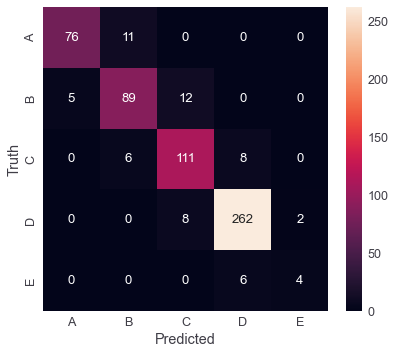

In [8]:
# training a Support Vector Machine classifier
rf = RandomForestClassifier(n_estimators=500,max_depth=11).fit(X_train, y_train)
rf_accuracy,rf_pred = model_performance(rf)

###### Accruracy is 90% which is quite Good

The accuracy of SVC(C=2, kernel='linear') is 91.0 %

              precision    recall  f1-score   support

           A       0.95      0.92      0.94        87
           B       0.88      0.88      0.88       106
           C       0.84      0.90      0.87       125
           D       0.96      0.93      0.95       272
           E       0.55      0.60      0.57        10

    accuracy                           0.91       600
   macro avg       0.83      0.85      0.84       600
weighted avg       0.91      0.91      0.91       600



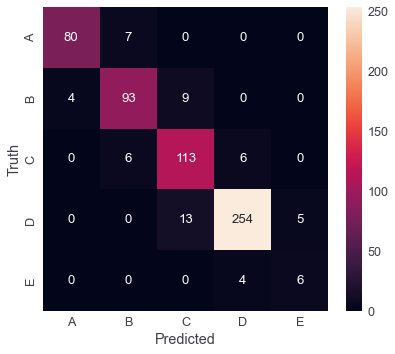

In [20]:
# training a Support Vector Machine classifier
svm_linear = SVC(kernel = 'linear', C = 2).fit(X_train, y_train)
svm_linear_accuracy,svm_linear_pred = model_performance(svm_linear)

###### Grades A,B,C,E are better classfied in the SVM Model

## We can observe that both RandomForest and SVM Model gives us highest accuracy among all the models we have tested so far
## If we see Grade-wise A,B,C,E are better classified by SVM model while for Grade D we get more accurate results by RandomForest Model

In [26]:
Pred_df = X_test
Pred_df["Actual Grade"]=y_test
Pred_df["Predicted Grade"]=svm_linear_pred
Pred_df.to_csv("Predicted Grade")  #saving the df in csv format
Pred_df                            #Displaying the ddf

,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,Expected price,Actual Grade,Predicted Grade
1801,350,7,6,5,7,0,0,110,5,4115,C,C
1190,314,7,6,6,7,1,92,86,5,3542,C,C
1817,343,5,3,3,4,1,113,81,1,3090,D,D
251,335,8,6,5,7,0,0,75,4,4316,C,C
2505,291,9,7,7,9,1,74,110,7,4040,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...
104,295,7,4,4,6,0,0,113,3,3753,D,D
2087,317,5,3,3,5,0,0,83,1,2882,D,D
599,333,9,6,5,7,1,105,109,6,4346,B,B
1756,310,6,4,3,4,1,99,79,4,3649,D,D


###### Creating widgets for getting user input

In [9]:
import ipywidgets as wg
from IPython.display import display 
from ipywidgets import interact
import time
import threading

In [10]:
Total_Rooms = wg.IntSlider(value=7,min=5,max=10,step=1,description="Total Rooms")
Total_Area = wg.BoundedFloatText(value=325,min=290,max=360,description="Total Area")
roof_Area = wg.BoundedFloatText(value=50,min=0,max=120,description="Roof Area")
lawn_Area = wg.BoundedFloatText(value=95,min=70,max=120,description="Lawn Area")
price = wg.BoundedFloatText(value=3800,min=2500,max=5300,description="Price")
floor = wg.IntSlider(value=4,min=1,max=7,step=1,description="Floors")
bedroom = wg.IntSlider(value=5,min=2,max=8,step=1,description="Bedrooms")
attached_washroom = wg.IntSlider(value=5,min=1,max=8,step=1,description="Attached W/C")
total_washroom = wg.IntSlider(value=6,min=2,max=10,step=1,description="Total W/C")
roof = wg.Dropdown(options=[('YES',1),('NO',0)],description="Roof ?")
done =  wg.Button()
display(Total_Area,Total_Rooms,bedroom,attached_washroom,total_washroom,roof,roof_Area,lawn_Area,floor,price)

BoundedFloatText(value=325.0, description='Total Area', max=360.0, min=290.0)

IntSlider(value=7, description='Total Rooms', max=10, min=5)

IntSlider(value=5, description='Bedrooms', max=8, min=2)

IntSlider(value=5, description='Attached W/C', max=8, min=1)

IntSlider(value=6, description='Total W/C', max=10, min=2)

Dropdown(description='Roof ?', options=(('YES', 1), ('NO', 0)), value=1)

BoundedFloatText(value=50.0, description='Roof Area', max=120.0)

BoundedFloatText(value=95.0, description='Lawn Area', max=120.0, min=70.0)

IntSlider(value=4, description='Floors', max=7, min=1)

BoundedFloatText(value=3800.0, description='Price', max=5300.0, min=2500.0)

In [11]:
exam = [[Total_Area.value,Total_Rooms.value,bedroom.value,attached_washroom.value,total_washroom.value,
           roof.value,roof_Area.value,lawn_Area.value,floor.value,price.value]]
print(f"The Grade of your Property is {svm_linear.predict(exam)[0]}")


NameError: name 'svm_linear' is not defined

In [ ]:
_